# Problem Statement

## Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 


### Task 1:-
###         Prepare a complete data analysis report on the given data.

### Task 2:-
###         Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('Flight_Fare.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [7]:
df.duplicated().sum()

220

There are minimum number of duplicated values in the given dataset, removal of duplicated values may result in the loss of important data. we can leave them, so that we can enhance the accuracy and effectiveness of our flight fare prediction model.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are two null values present in the given dataset.

In [10]:
df.dropna(inplace=True)

we dropped the null values.

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
date_time_col=['Date_of_Journey','Arrival_Time','Dep_Time']
for column in date_time_col:
    df[column]=pd.to_datetime(df[column])

we converted 'Date_of_Journey','Arrival_Time','Dep_Time' columns into datetime format.

In [13]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
df1 = df.copy()
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-12-21 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-21 05:50:00,2023-12-21 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-12-21 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-12-21 18:05:00,2023-12-21 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-12-21 16:50:00,2023-12-21 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2023-12-21 19:55:00,2023-12-21 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2023-12-21 20:45:00,2023-12-21 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2023-12-21 08:20:00,2023-12-21 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2023-12-21 11:30:00,2023-12-21 14:10:00,2h 40m,non-stop,No info,12648


Here we copied the dataset into another dataframe because we dont want to disturb the actual data.

## Data Analysis

## Univariate Analysis

In [15]:
# numerical columns and categorical columns:
numerical_columns = df[['Date_of_Journey','Dep_Time','Arrival_Time','Duration']]
categorical_columns = df[['Airline','Source','Destination','Route','Total_Stops','Additional_Info']]

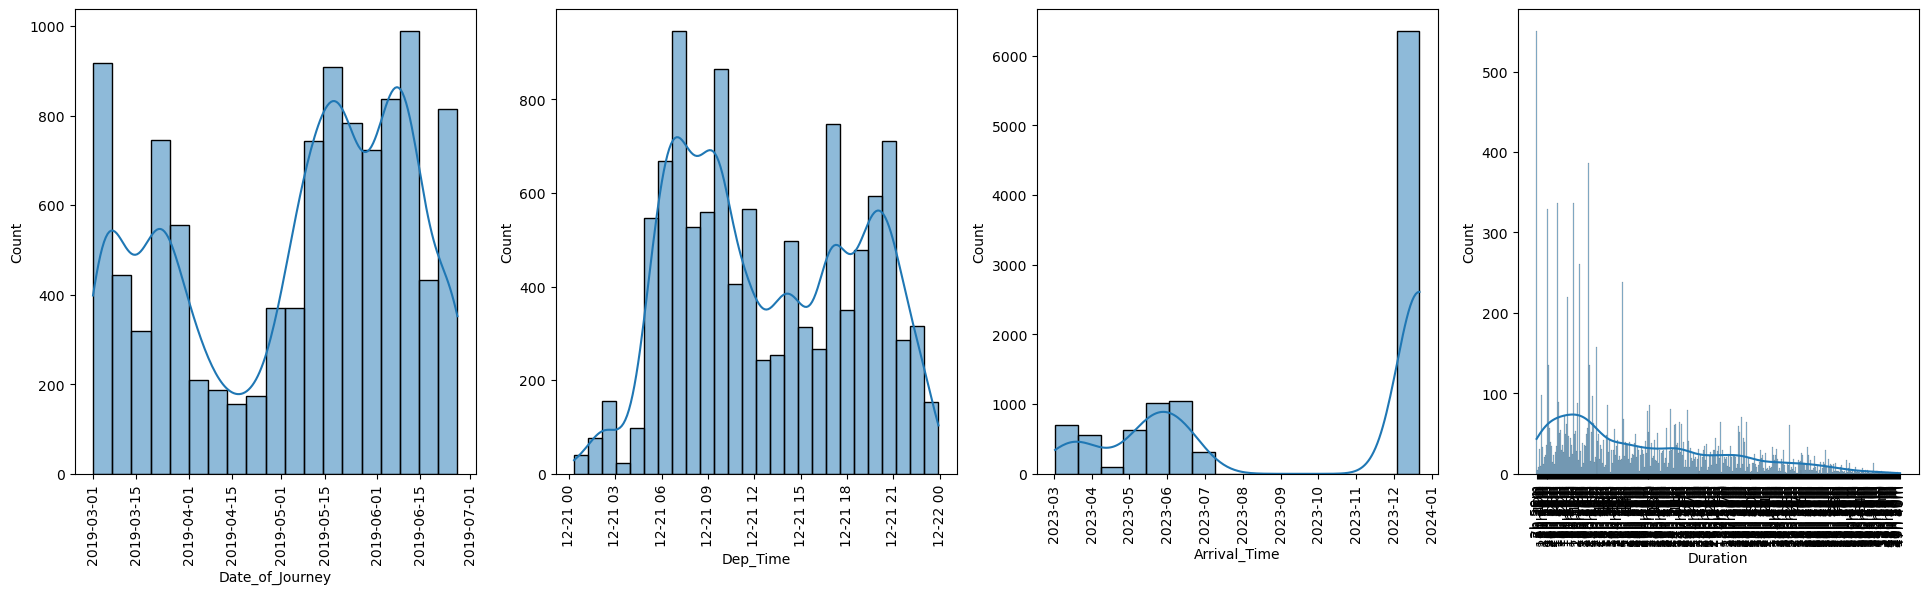

In [16]:
# histplot
plt.figure(figsize=(30,35))
plotnumber=1

for column in numerical_columns:   # Iterate over each categorical column
        ax=plt.subplot(5,5,plotnumber)
        sns.histplot(x=df[column],kde=True)
        plt.xlabel(column)       # Set x-axis label
        plt.ylabel('Count')      # Set y-axis label
        plt.xticks(rotation=90)
        plotnumber+=1
plt.tight_layout
plt.show()

### Insights:

It is evident that the graph is overlapping significantly making it difficult to understand the clear distribution.

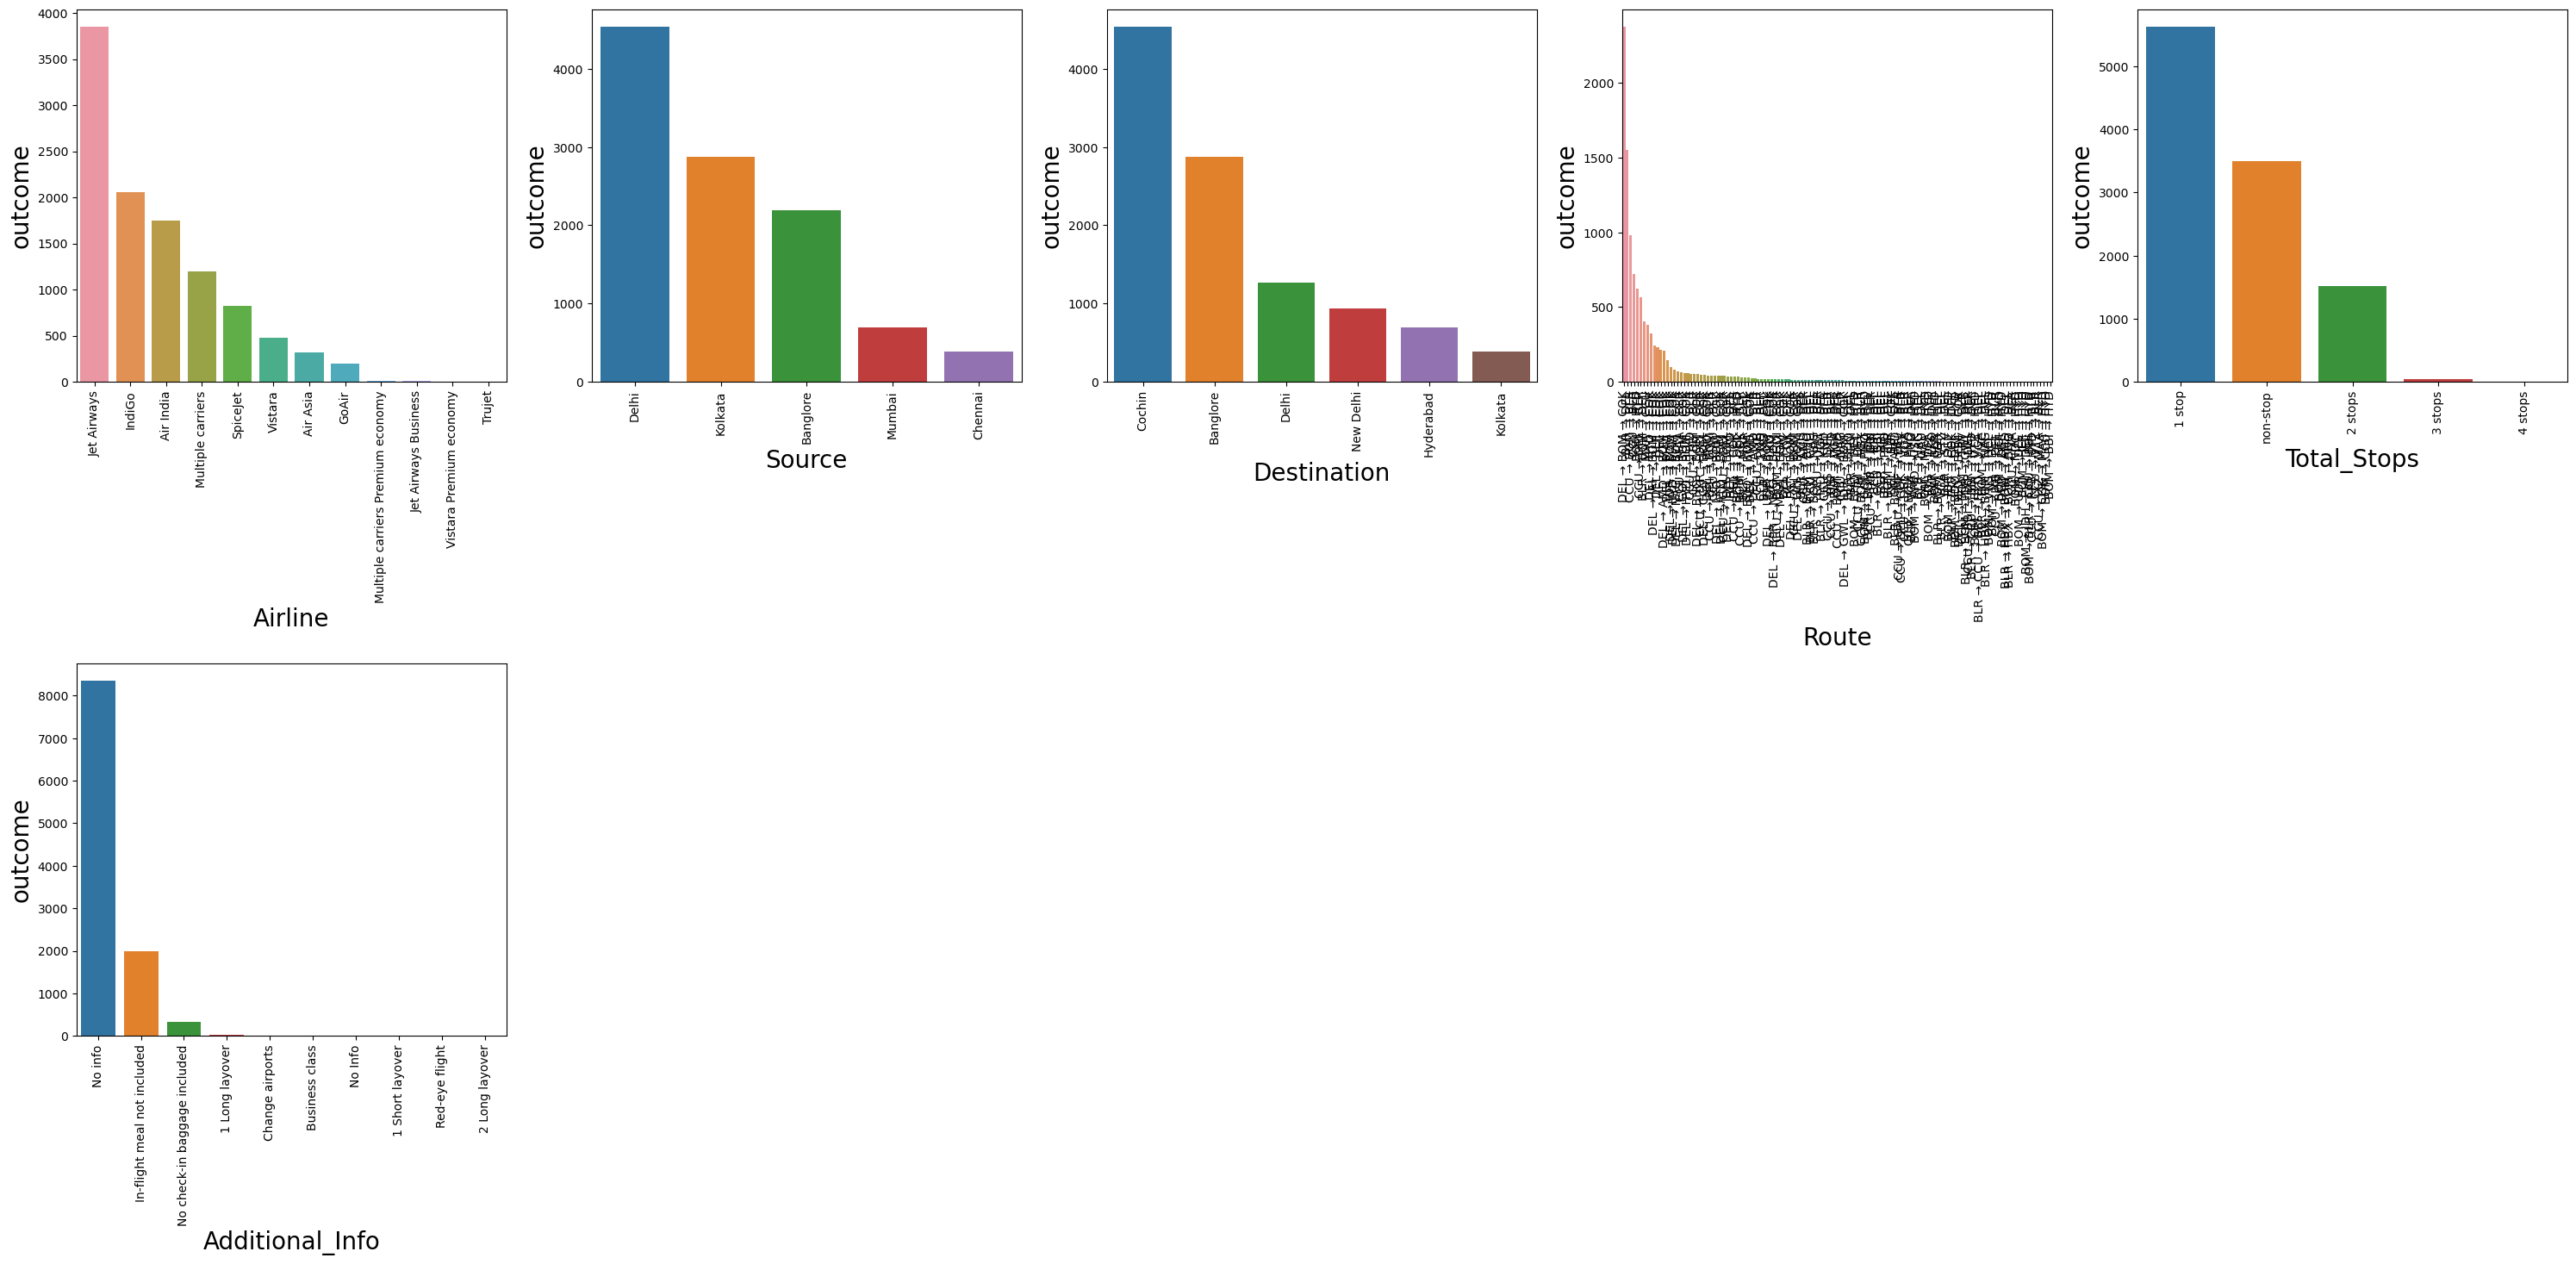

In [17]:
# Count plot 
plt.figure(figsize=(30, 35), facecolor='white')  # Set the size of the entire figure

plotnumber = 1  # Initialize the plot number

for column in categorical_columns:  # Iterate over each categorical column
    ax = plt.subplot(5, 5, plotnumber)  # Create a subplot for each categorical variable
    sns.countplot(x=column, data=categorical_columns, order=categorical_columns[column].value_counts().index)  # Create a count plot
    plt.xlabel(column, fontsize=20)  # Set x-axis label
    plt.ylabel('outcome', fontsize=20)  # Set y-axis label
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plotnumber += 1  # Increment the plot number

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plot

In [18]:
df['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

As the countplot of Route is unclear, we showed value_counts for better understanding.

### Insights:

## Bivariate Analysis

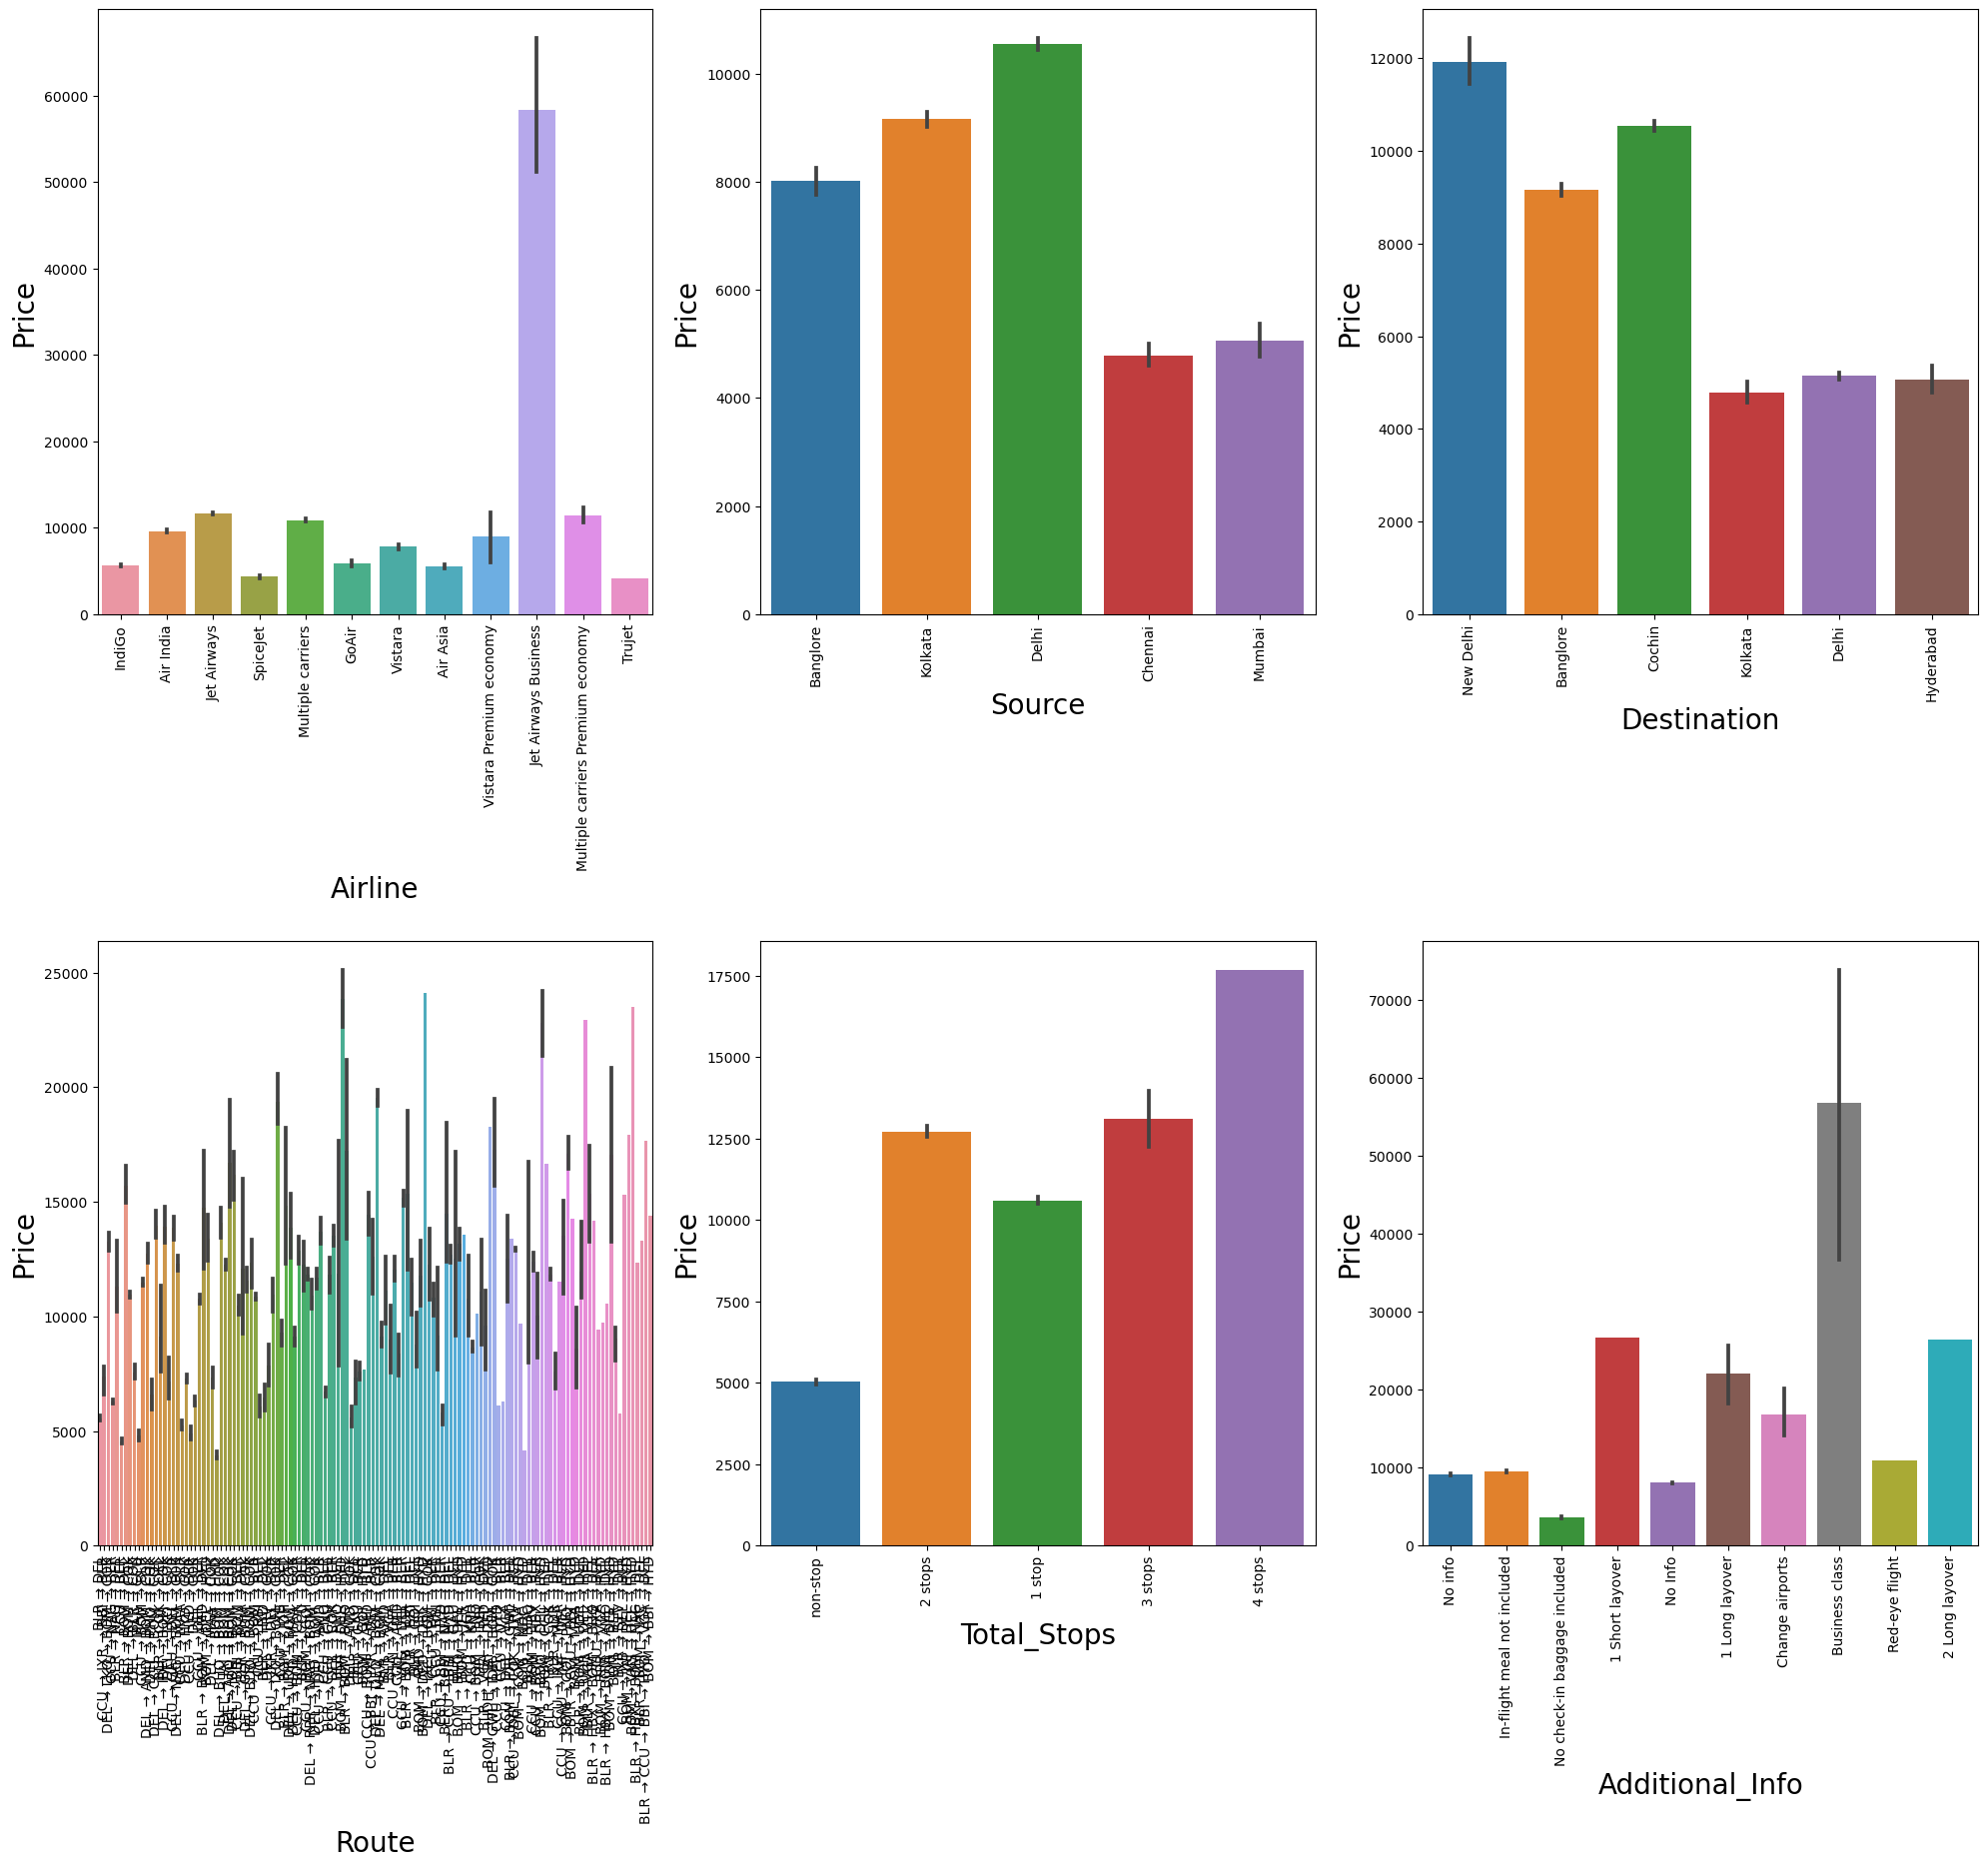

In [19]:
# barplot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in categorical_columns:
        ax= plt.subplot(3,3,plotnumber)
        sns.barplot(x=df[column],y=df['Price'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
        plt.xticks(rotation=90)
        plotnumber+=1
plt.tight_layout()

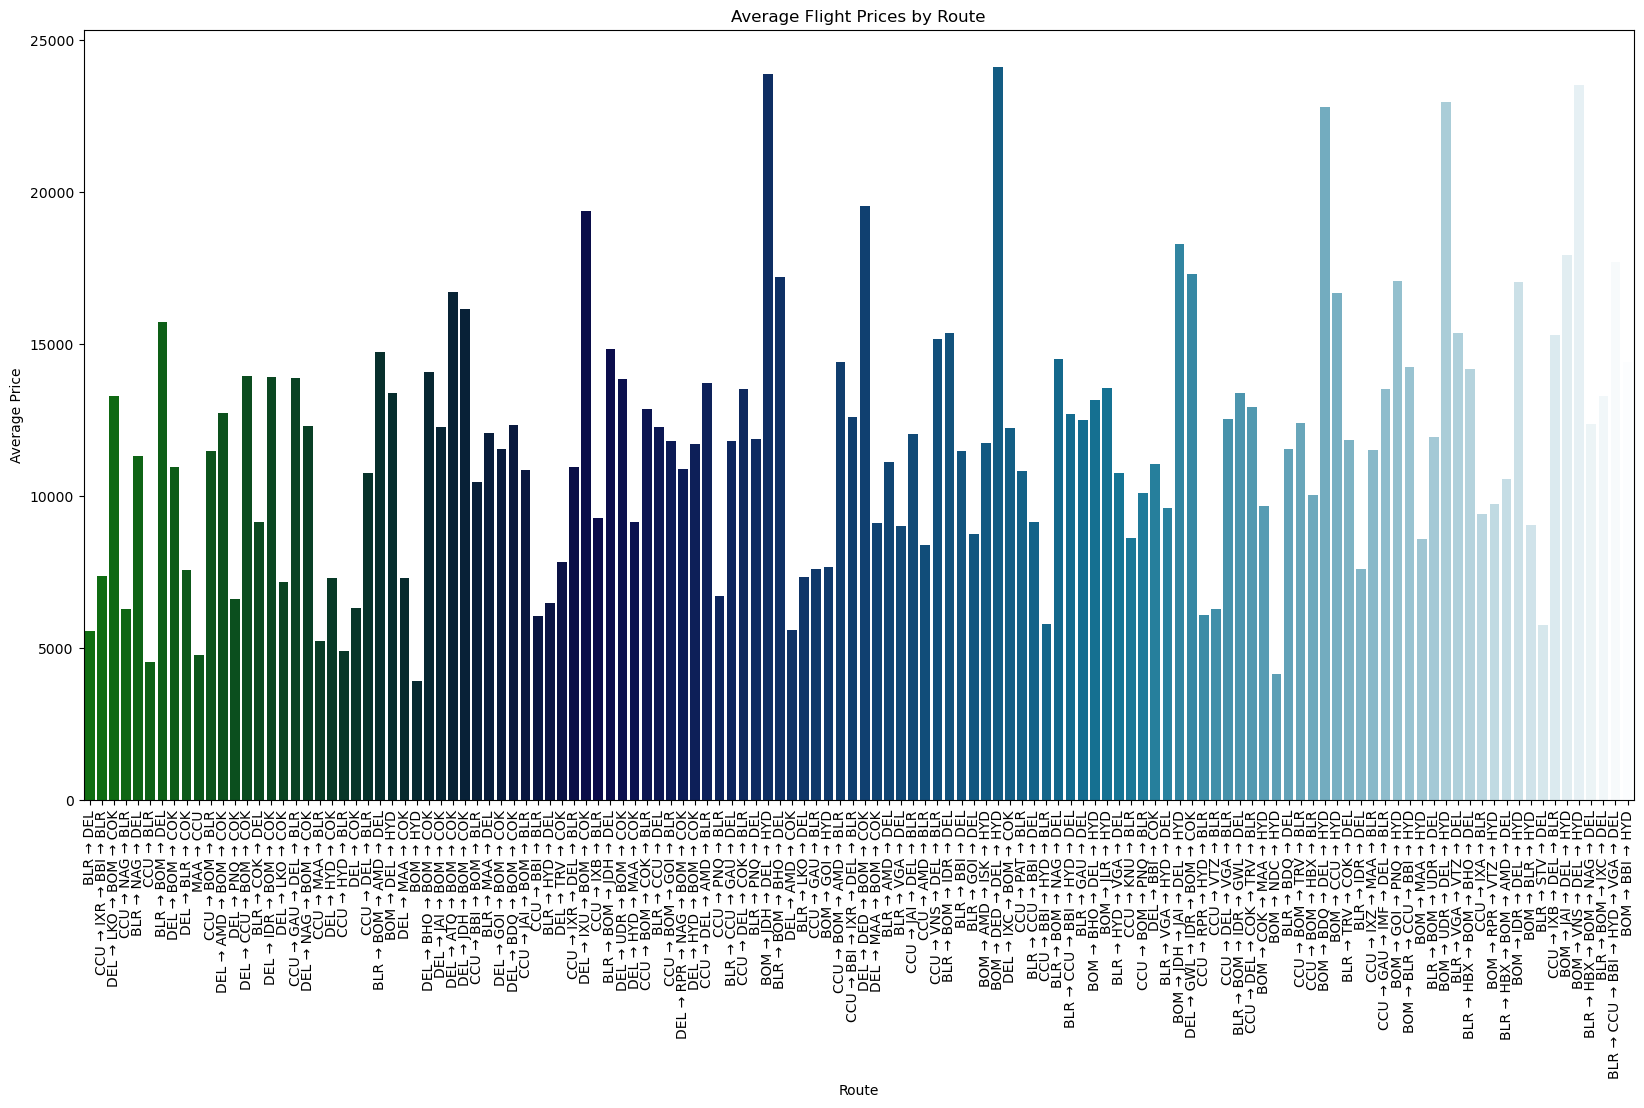

In [20]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Route', y='Price', data=df, ci=None, palette='ocean')
plt.title('Average Flight Prices by Route')
plt.xlabel('Route')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

### Insights:

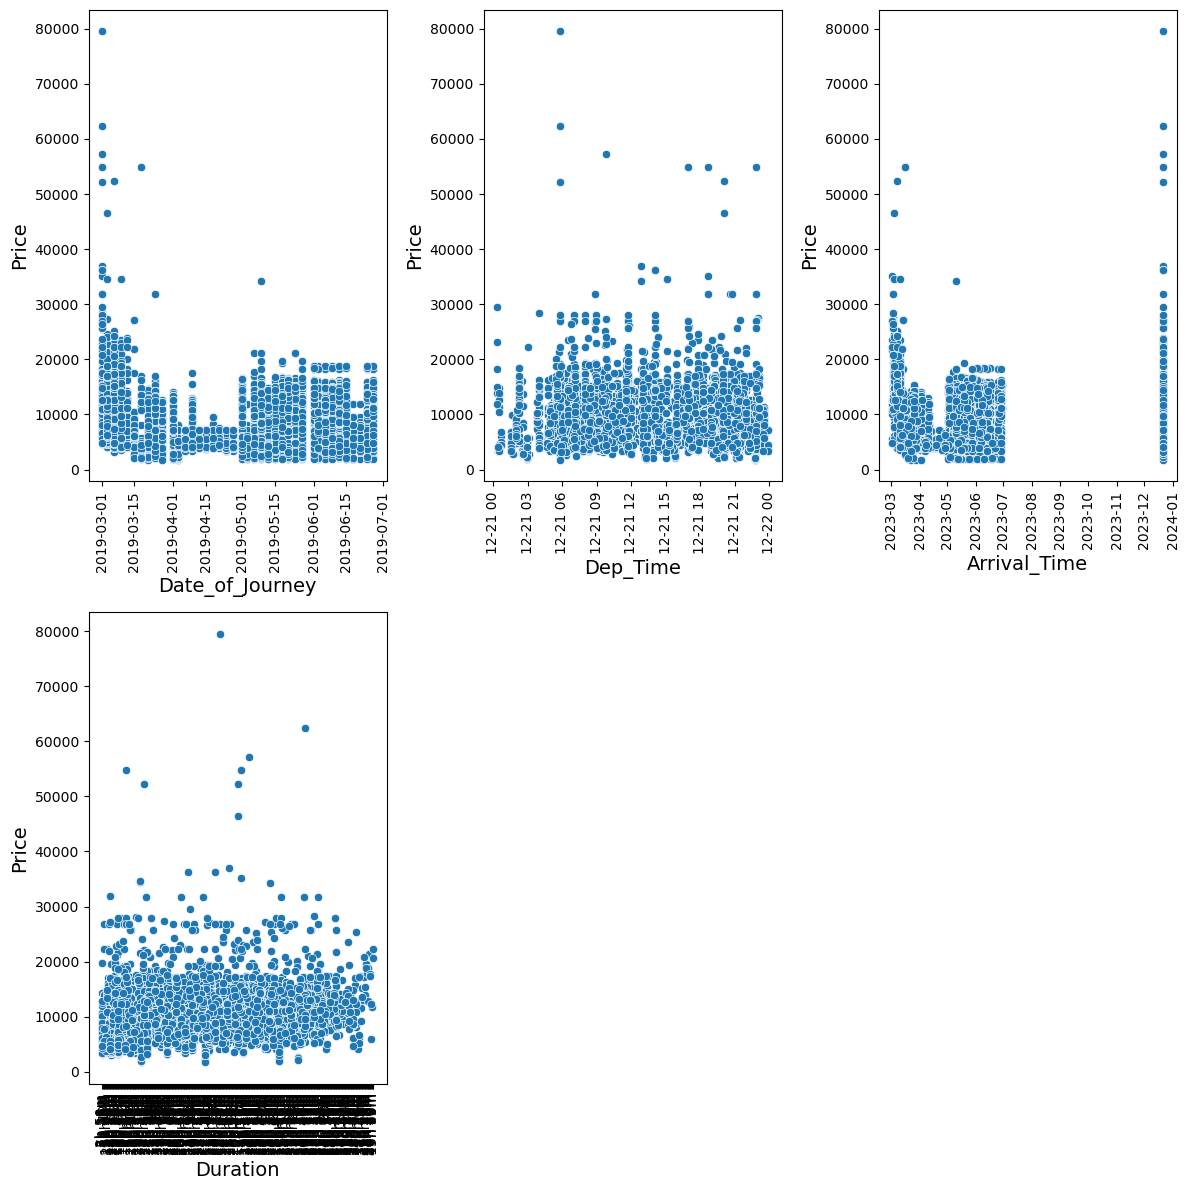

In [21]:
# Scatter plot
plt.figure(figsize = (12, 12))
plotnumber = 1
for i in numerical_columns:
    plt.subplot(2, 3, plotnumber)
    sns.scatterplot(x = df[i], y = df.Price)
    plt.xlabel(i, fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plotnumber+=1
    plt.xticks(rotation=90)
plt.tight_layout()

### Insights:

There are no links between any of these features.

## Data Preprocessing

In [22]:
# To extract the 'Date_of_Journey' column into new columns 'Day' and 'Month' for prediction purposes
df1['Day']=df1.Date_of_Journey.dt.day
df1['Month']=df1['Date_of_Journey'].dt.month

In [23]:
# To extract the 'Dep_time' column into new columns 'Dep_hour' and 'Dep_min for prediction purposes
df1['Dep_Hour']=df1['Dep_Time'].dt.hour
df1['Dep_Minute']=df1['Dep_Time'].dt.minute

In [24]:
# To extract the 'Arrival_time' column into new columns 'Arr_hour' and 'Arr_min for prediction purposes
df1['Arr_Hour']=df1['Arrival_Time'].dt.hour
df1['Arr_Minute']=df1['Arrival_Time'].dt.minute

In [25]:
df1['Duration']=pd.to_timedelta(df['Duration']).dt.total_seconds()
df1['Duration_minute']=df1['Duration']/60

In [26]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-12-21 22:20:00,2023-03-22 01:10:00,10200.0,non-stop,No info,3897,24,3,22,20,1,10,170.0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-21 05:50:00,2023-12-21 13:15:00,26700.0,2 stops,No info,7662,1,5,5,50,13,15,445.0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-12-21 09:25:00,2023-06-10 04:25:00,68400.0,2 stops,No info,13882,9,6,9,25,4,25,1140.0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-12-21 18:05:00,2023-12-21 23:30:00,19500.0,1 stop,No info,6218,12,5,18,5,23,30,325.0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-12-21 16:50:00,2023-12-21 21:35:00,17100.0,1 stop,No info,13302,1,3,16,50,21,35,285.0


We extracted 'Day' & 'Month' from "Date_of_Journey" column, 'Dep_Hour' & 'Dep_Minute' from "Dep_Time" column, 'Arr_Hour' & 'Arr_Minute' from "Arrival_Time" column. And we converted 'Duration' into "Duration_Minute". Now we can drop these ('Date_of_Journey' , 'Dep_Time' , 'Arrival_Time' , 'Duration') columns.

In [27]:
# List of columns to be dropped
columns_to_drop = ['Date_of_Journey','Dep_Time','Arrival_Time','Duration']

In [28]:
df1.drop(columns=columns_to_drop, inplace=True)

In [29]:
df1['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

By analyzing the above data, we get to know that here 'No info' has more than 80% of data so it doesn't contain much information
hence we are dropping this column.

In [30]:
df1.drop('Additional_Info',inplace=True,axis=1)

## Converting Categorical Columns to Numerical Columns

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [32]:
df1['Airline'] = le.fit_transform(df1['Airline'])
df1['Source'] = le.fit_transform(df1['Source'])
df1['Destination'] = le.fit_transform(df1['Destination'])
df1['Total_Stops'] = le.fit_transform(df1['Total_Stops'])
df1['Route'] = le.fit_transform(df1['Route'])

In [33]:
df1

,Airline,Source,Destination,Route,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_minute
0,3,0,5,18,4,3897,24,3,22,20,1,10,170.0
1,1,3,0,84,1,7662,1,5,5,50,13,15,445.0
2,4,2,1,118,1,13882,9,6,9,25,4,25,1140.0
3,3,3,0,91,0,6218,12,5,18,5,23,30,325.0
4,3,0,5,29,0,13302,1,3,16,50,21,35,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,4107,9,4,19,55,22,25,150.0
10679,1,3,0,64,4,4145,27,4,20,45,23,20,155.0
10680,4,0,2,18,4,7229,27,4,8,20,11,20,180.0
10681,10,0,5,18,4,12648,1,3,11,30,14,10,160.0


All categorical columns are converted into numerical columns.